In [1]:
import csv

data = list(csv.reader(open('guns.csv')))

data[:5]

[['',
  'year',
  'month',
  'intent',
  'police',
  'sex',
  'age',
  'race',
  'hispanic',
  'place',
  'education'],
 ['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]

In [8]:
def tally_count(data, index):
    '''
    data: list of lists
    index: integer; represents index at which the data that is to be tallied up 
    is located. index values will become result dictionary keys.
    
    function takes in data, loops through items and tallies the total number
    of times the data at an index occurs.
    '''
    result = {}
    for row in data:
        if row[index] in data:
            result[row[index]] += 1
        else:
            result[row[index]] = 1
    return result

In [9]:
headers = data[0]
data = data[1:]
headers
print(data[:5])

[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


In [10]:
print(headers)

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']


In [14]:
def tally_occurrences(data, index):
    '''
    data: list of lists
    index: integer; represents index at which values to be tallied
    are located. index values become dictionary keys.
    
    function takes in a data set comprised of a list of lists and tallies
    the number of times a certain value occurs in the dataset. the 
    result is a dictionary whose values represent the number of times a value
    occured in the original dataset.
    '''
    result = {}
    for row in data:
        if row[index] in result:
            result[row[index]] += 1
        else:
            result[row[index]] = 1
    return result

In [15]:
year_counts = tally_occurrences(data,1)
print(year_counts)

{'2012': 33563, '2013': 33636, '2014': 33599}


In [19]:
import datetime

dates = [datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in data]
print(dates[:5])

[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 2, 1, 0, 0), datetime.datetime(2012, 2, 1, 0, 0)]


In [20]:
date_counts = {}
for item in dates:
    if item in date_counts:
        date_counts[item] += 1
    else:
        date_counts[item] = 1

print(date_counts)

{datetime.datetime(2014, 11, 1, 0, 0): 2756, datetime.datetime(2014, 5, 1, 0, 0): 2864, datetime.datetime(2014, 3, 1, 0, 0): 2684, datetime.datetime(2014, 12, 1, 0, 0): 2857, datetime.datetime(2014, 10, 1, 0, 0): 2865, datetime.datetime(2012, 11, 1, 0, 0): 2729, datetime.datetime(2012, 2, 1, 0, 0): 2357, datetime.datetime(2012, 10, 1, 0, 0): 2733, datetime.datetime(2013, 10, 1, 0, 0): 2808, datetime.datetime(2013, 6, 1, 0, 0): 2920, datetime.datetime(2014, 9, 1, 0, 0): 2914, datetime.datetime(2013, 2, 1, 0, 0): 2375, datetime.datetime(2013, 8, 1, 0, 0): 2859, datetime.datetime(2012, 6, 1, 0, 0): 2826, datetime.datetime(2012, 9, 1, 0, 0): 2852, datetime.datetime(2014, 7, 1, 0, 0): 2884, datetime.datetime(2014, 4, 1, 0, 0): 2862, datetime.datetime(2013, 9, 1, 0, 0): 2742, datetime.datetime(2013, 1, 1, 0, 0): 2864, datetime.datetime(2013, 4, 1, 0, 0): 2798, datetime.datetime(2012, 1, 1, 0, 0): 2758, datetime.datetime(2012, 12, 1, 0, 0): 2791, datetime.datetime(2012, 8, 1, 0, 0): 2954, dat

In [21]:
headers

['',
 'year',
 'month',
 'intent',
 'police',
 'sex',
 'age',
 'race',
 'hispanic',
 'place',
 'education']

In [22]:
sex_counts = tally_occurrences(data, 5)
race_counts = tally_occurrences(data, 7)
print(sex_counts)
print(race_counts)

{'M': 86349, 'F': 14449}
{'Native American/Native Alaskan': 917, 'Asian/Pacific Islander': 1326, 'White': 66237, 'Hispanic': 9022, 'Black': 23296}


## Gun Deaths Recap

So far, we've learned that gun deaths have not fluctuated significantly throughout the three years included in the dataset (2012-2014). `sex_counts` is not that surprising, given that men are more likely to die violently than women.  `race_counts` doesn't really tell us much because it's total deaths; calculating the proportion of the overall racial population that these deaths represent would be more  illuminating. 

Some points that need further investigation/stuff I'm curious to see: 

- Is there a marked difference in the `intent` behind female and males gun deaths? 
    - I've read that women are more likely to die by partner violence and men are more likely to use guns to commit suicide. So let's compare, shall we?

- What percentage of the overall racial population do gun deaths constitute according to our data?
    - This should show that while white people have the highest total causalities due to gun deaths, they don't constitute a large percentage of the overall white population. I expect the black ratio to be the highest.

- Is there any noticable uptick in gun deaths during certain times of year?
    - I remember reading that violence/crime increases in the summer when people are outdoors. I want to see if this dataset might support that. Also, apparently suicides tick up over the holidays. That would be interesting to see.

- Are there any patters discernable in instances of a gun death where a police officer was involved?
    - Bascially, I want to see what race is general involved (I'm predicting mosly black) and what the `intent` is recorded as. 

In [23]:
census = list(csv.reader(open('census.csv')))
census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

In [24]:
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

In [25]:
mapping = {'Asian/Pacific Islander': 15834141, 'Black':40250635, 'Hispanic': 44618105, 'Native American/Native Alaskan': 3739506, 'White': 197318956}

In [26]:
race_per_hundredk = {}
for key, value in race_counts.items():
    race_per_hundredk[key] = (value / mapping[key]) * 100000

print(race_per_hundredk)

{'Hispanic': 20.220491210910907, 'Native American/Native Alaskan': 24.521955573811088, 'White': 33.56849303419181, 'Black': 57.8773477735196, 'Asian/Pacific Islander': 8.374309664161762}


In [28]:
intents = [row[3] for row in data]
races = [row[7] for row in data]
print(intents[:5])

['Suicide', 'Suicide', 'Suicide', 'Suicide', 'Suicide']


In [29]:
homicide_race_counts = {}
for i, race in enumerate(races):
    if intents[i] == 'Homicide':
        if race in homicide_race_counts:
            homicide_race_counts[race] += 1
        else:
            homicide_race_counts[race] = 1

print(homicide_race_counts)

{'Native American/Native Alaskan': 326, 'Black': 19510, 'Asian/Pacific Islander': 559, 'White': 9147, 'Hispanic': 5634}


In [30]:
for key, value in homicide_race_counts.items():
    homicide_race_counts[key] = (value / mapping[key]) * 100000

print(homicide_race_counts)

{'Native American/Native Alaskan': 8.717729026240365, 'Black': 48.471284987180944, 'Asian/Pacific Islander': 3.530346230970155, 'White': 4.6356417981453335, 'Hispanic': 12.627161104219914}


## Findings Breakdown

Below is a bulleted list of the data from `race_per_hundredk` and `homicide_race_counts`, rounded to 2 decimal points, for ease of comparison. 

Information is listed as Race: `race_per_hundredk` / **`homicide_race_count`** where `race_per_hundredk` is the overall number of gun deaths per 100,000 people per race and **`homicide_race_count`** is the murder rate per 100,000 people per race.

- Native American/Native Alaskan: 24.52 / **8.72**
- Black: 57.88 / **48.47**
- Asian/Pacific Islander: 8.37 / **3.53**
- White: 33.57 / **4.64**
- Hispanic: 20.22 / **12.63**

As I predicted in an earlier markdown cell, black American's are more likely to experience gun violence than Americans of other races. I did not realize how significant the difference would be, particularly when it came to murders/100,000 people (`homicide_race_count`). Hispanic Americans come next at 12.63 murders/100,000 people, but that still pales in comparison to black Americans' stat of 48.47/100,000.

While I think this is correct, it certainly agrees with everything I've ever read or any studies I've seen mentioned in the news, one thing to note is that the `census.csv` data had an additional category in its racial breakdown than did `guns.csv`. According to the census data, 6,984,195 people identified as `Two or More Races`. This could change the totals captured in `race_per_hundredk` and `homicide_race_count`. However, even if all of the people who identifed as `Two or More Races` were added to the black population, the totals for gun deaths/100,000 people and murder/100,000 people would still be significantly higher for the black population:

- Black: 49.32 / **41.30**

This still constitutes numbers that are still over 20 base points (is base points a word? I need some statistics training...) above the next highest racial group, Hispanics. 

### Up Next
I would still like to look into the questions I had expressed in an earlier markdown cell: 

- Is there a marked difference in the `intent` behind female and males gun deaths? 
    - I've read that women are more likely to die by partner violence and men are more likely to use guns to commit suicide. So let's compare, shall we?

- Is there any noticable uptick in gun deaths during certain times of year?
    - I remember reading that violence/crime increases in the summer when people are outdoors. I want to see if this dataset might support that. Also, apparently suicides tick up over the holidays. That would be interesting to see.

- Are there any patterns discernable in instances of a gun death where a police officer was involved?
    - Bascially, I want to see what race is general involved (I'm predicting mosly black) and what the `intent` is recorded as. 
    
_Additional questions from Dataquest:_

- Find out if gun death rates correlate to location and education.

In [2]:
# reloading data and function(s)

import csv

data = list(csv.reader(open('guns.csv')))
header = data[0]
data = data[1:]

import datetime

dates = [datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in data]

def tally_occurrences(data, index):
    '''
    data: list of lists
    index: integer; represents index at which values to be tallied
    are located. index values become dictionary keys.
    
    function takes in a data set comprised of a list of lists and tallies
    the number of times a certain value occurs in the dataset. the 
    result is a dictionary whose values represent the number of times a value
    occured in the original dataset.
    '''
    result = {}
    for row in data:
        if row[index] in result:
            result[row[index]] += 1
        else:
            result[row[index]] = 1
    return result

date_counts = {}
for item in dates:
    if item in date_counts:
        date_counts[item] += 1
    else:
        date_counts[item] = 1

In [3]:
data[:5]

[['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'],
 ['5',
  '2012',
  '02',
  'Suicide',
  '0',
  'M',
  '31',
  'White',
  '100',
  'Other specified',
  '2']]

In [4]:
date_counts

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

## Intent
- Is there a marked difference in the `intent` behind female and males gun deaths? 
    - I've read that women are more likely to die by partner violence and men are more likely to use guns to commit suicide. So let's compare, shall we?

Will also look at overall counts of gun deaths by `intent` because it'll be fun. 

#### Steps:

1. Look at overall counts of gun deaths by `intent` by tallying all occurrences according to the `intent` column.

2. Count overall gun deaths by `intent` and sex; result will be two dictionaries, `female_gun_deaths` and `male_gun_deaths`.

3. Compose markdown cell to look at results. 


In [5]:
header

['',
 'year',
 'month',
 'intent',
 'police',
 'sex',
 'age',
 'race',
 'hispanic',
 'place',
 'education']

In [6]:
overall_intent = tally_occurrences(data, 3)
print(overall_intent)

{'Suicide': 63175, 'Undetermined': 807, 'Accidental': 1639, 'Homicide': 35176, 'NA': 1}


In [8]:
sex_counts = tally_occurrences(data, 5)
print(sex_counts)

{'M': 86349, 'F': 14449}


In [11]:
female_gun_deaths = {}
male_gun_deaths = {}

for row in data:
    if row[5] == "M":
        if row[3] in male_gun_deaths:
            male_gun_deaths[row[3]] += 1
        else:
            male_gun_deaths[row[3]] = 1
    elif row[5] == "F":
        if row[3] in female_gun_deaths:
            female_gun_deaths[row[3]] += 1
        else:
            female_gun_deaths[row[3]] = 1

In [12]:
print(female_gun_deaths)
print(male_gun_deaths)

{'Suicide': 8689, 'Homicide': 5373, 'Undetermined': 169, 'Accidental': 218}
{'Suicide': 54486, 'Undetermined': 638, 'Accidental': 1421, 'Homicide': 29803, 'NA': 1}


In [15]:
# create dictionaries with percentages to help this make a little more sense...

female_intent_perc = {}
male_intent_perc = {}

for key, value in female_gun_deaths.items():
    female_intent_perc[key] = (value / 14449) * 100
    
for key, value in male_gun_deaths.items():
    male_intent_perc[key] = (value / 86349) * 100

In [16]:
print(female_intent_perc)
print(male_intent_perc)

{'Suicide': 60.135649525918744, 'Homicide': 37.18596442660392, 'Undetermined': 1.169631116340231, 'Accidental': 1.508754931137103}
{'Suicide': 63.099746378070385, 'Undetermined': 0.7388620597806576, 'Accidental': 1.64564731496601, 'Homicide': 34.51458615618016, 'NA': 0.0011580910027909994}


## Intent and Sex Roundup

Overall:

- `{'Suicide': 63175, 'Undetermined': 807, 'Accidental': 1639, 'Homicide': 35176, 'NA': 1}`

Female Stats:

- Total gun deaths recorded: 14,449
    - Total due to Suicide: 8,689 (60.14%)
    - Total due to Homicide: 5,373 (37.19%)
    - Total due to Undetermined: 169 (1.17%)
    - Total due to Accidental: 218 (1.50%)

Male Stats:

- Total gun deaths recorded: 86,349
    - Total due to Suicide: 54,486 (63.10%)
    - Total due to Homicide: 29,803 (34.51%)
    - Total due to Undetermined: 638 (0.74%)
    - Total due to Accidental: 1,421 (1.65%)
    - Total due to NA: 1 (0.0011%)

In the beginning I had expected that women would be more likely than men to die from homicide and that men in turn would have a higher proportion dying from suicide. Looking at the percentages above, these assumptions bore out, but they were not very pronounced; each assumption was proven by roughly 3 percentage points each. This is less than expected, but still noticeable. 

## Next up: 

- Is there any noticable uptick in gun deaths during certain times of year?
    - I remember reading that violence/crime increases in the summer when people are outdoors. I want to see if this dataset might support that.
    
- Does cause of death change with the months of the year? 
    - Apparently suicides tick up over the holidays. That would be interesting to see.

#### Steps:

- Loop over `data` dataset, to create a new dictionary that includes totals for all months 2012-2014.

- Create dictionaries per month that look at the number of deaths by `intent` and adds up the occurences.

- Turn month totals into percentages.

- Markdown cell looking at results.


In [19]:
month_total = tally_occurrences(data, 2)
print(month_total)

{'01': 8273, '02': 7093, '03': 8289, '04': 8455, '05': 8669, '06': 8677, '07': 8989, '08': 8783, '09': 8508, '10': 8406, '11': 8243, '12': 8413}


In [20]:
def get_month_totals(data, index, month):
    '''
    data: list of lists
    index: integer; index that points to the values to be tallied, in this case under the intent column
    month: integer, 1-12 representing a month out of the year
    
    function returns a dictionary that contains totals for for each indexed value during that month within the dataset.
    values at index are keys.
    '''
    result = {}
    for row in data:
        if row[2] == month:
            if row[index] in result:
                result[row[index]] += 1
            else:
                result[row[index]] = 1
    return result
            
            

In [24]:
Jan_intents = get_month_totals(data, 3, '01')
Feb_intents = get_month_totals(data, 3, '02')
Mar_intents = get_month_totals(data, 3, '03')
Apr_intents = get_month_totals(data, 3, '04')
May_intents = get_month_totals(data, 3, '05')
Jun_intents = get_month_totals(data, 3, '06')
Jul_intents = get_month_totals(data, 3, '07')
Aug_intents = get_month_totals(data, 3, '08')
Sep_intents = get_month_totals(data, 3, '09')
Oct_intents = get_month_totals(data, 3, '10')
Nov_intents = get_month_totals(data, 3, '11')
Dec_intents = get_month_totals(data, 3, '12')

In [26]:
print(Jan_intents)
print(Feb_intents)
print(Mar_intents)
print(Apr_intents)
print(May_intents)
print(Jun_intents)
print(Jul_intents)
print(Aug_intents)
print(Sep_intents)
print(Oct_intents)
print(Nov_intents)
print(Dec_intents)

{'Suicide': 5220, 'Homicide': 2829, 'Accidental': 152, 'Undetermined': 72}
{'Suicide': 4732, 'Undetermined': 56, 'Accidental': 127, 'Homicide': 2178}
{'Suicide': 5309, 'Homicide': 2780, 'Undetermined': 66, 'Accidental': 134}
{'Suicide': 5438, 'Homicide': 2845, 'Undetermined': 73, 'Accidental': 98, 'NA': 1}
{'Suicide': 5506, 'Accidental': 115, 'Homicide': 2976, 'Undetermined': 72}
{'Homicide': 3130, 'Suicide': 5367, 'Undetermined': 68, 'Accidental': 112}
{'Homicide': 3269, 'Suicide': 5514, 'Accidental': 149, 'Undetermined': 57}
{'Homicide': 3125, 'Suicide': 5421, 'Accidental': 164, 'Undetermined': 73}
{'Accidental': 118, 'Suicide': 5343, 'Undetermined': 81, 'Homicide': 2966}
{'Suicide': 5256, 'Homicide': 2968, 'Undetermined': 51, 'Accidental': 131}
{'Suicide': 5086, 'Homicide': 2919, 'Accidental': 160, 'Undetermined': 78}
{'Suicide': 4983, 'Homicide': 3191, 'Undetermined': 60, 'Accidental': 179}


In [2]:
import csv

data = list(csv.reader(open('guns.csv')))
header = data[0]
data = data[1:]

import datetime

dates = [datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in data]

def tally_occurrences(data, index):
    '''
    data: list of lists
    index: integer; represents index at which values to be tallied
    are located. index values become dictionary keys.
    
    function takes in a data set comprised of a list of lists and tallies
    the number of times a certain value occurs in the dataset. the 
    result is a dictionary whose values represent the number of times a value
    occured in the original dataset.
    '''
    result = {}
    for row in data:
        if row[index] in result:
            result[row[index]] += 1
        else:
            result[row[index]] = 1
    return result

date_counts = {}
for item in dates:
    if item in date_counts:
        date_counts[item] += 1
    else:
        date_counts[item] = 1

month_total = tally_occurrences(data, 2)

def get_month_totals(data, index, month):
    '''
    data: list of lists
    index: integer; index that points to the values to be tallied, in this case under the 
    intent column
    month: string, zero padded, 2 digit number; 01-12 representing a month out of the year
    
    function returns a dictionary that contains totals for for each indexed value during that month within the dataset.
    values at index are keys.
    '''
    result = {}
    for row in data:
        if row[2] == month:
            if row[index] in result:
                result[row[index]] += 1
            else:
                result[row[index]] = 1
    return result


Jan_intents = get_month_totals(data, 3, '01')
Feb_intents = get_month_totals(data, 3, '02')
Mar_intents = get_month_totals(data, 3, '03')
Apr_intents = get_month_totals(data, 3, '04')
May_intents = get_month_totals(data, 3, '05')
Jun_intents = get_month_totals(data, 3, '06')
Jul_intents = get_month_totals(data, 3, '07')
Aug_intents = get_month_totals(data, 3, '08')
Sep_intents = get_month_totals(data, 3, '09')
Oct_intents = get_month_totals(data, 3, '10')
Nov_intents = get_month_totals(data, 3, '11')
Dec_intents = get_month_totals(data, 3, '12')

In [6]:
import pylab as plt

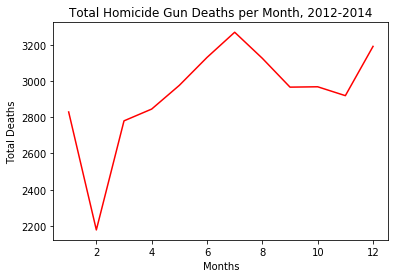

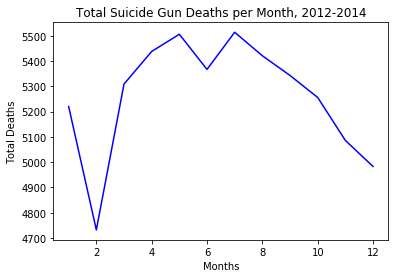

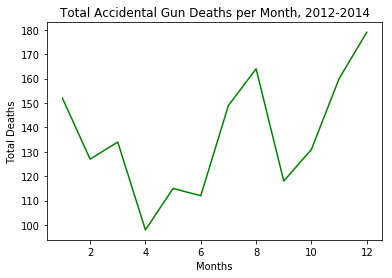

In [11]:
#y values taken from month intent totals above
#the first time I tried to use strings for x_values and it was a scribbly mess... it alphabetized everything
months_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
homicide_y = [2829, 2178, 2780, 2845, 2976, 3130, 3269, 3125, 2966, 2968, 2919, 3191]
suicide_y = [5220, 4732, 5309, 5438, 5506, 5367, 5514, 5421, 5343, 5256, 5086, 4983]
accidental_y = [152, 127, 134, 98, 115, 112, 149, 164, 118, 131, 160, 179]
undetermined_y = [72, 56, 66, 73, 72, 68, 57, 73, 81, 51, 78, 60]

plt.figure('homicide')
plt.clf()
plt.title('Total Homicide Gun Deaths per Month, 2012-2014')
plt.xlabel("Months")
plt.ylabel("Total Deaths")
plt.plot(months_x, homicide_y, 'r-')

plt.figure('suicide')
plt.clf()
plt.title('Total Suicide Gun Deaths per Month, 2012-2014')
plt.xlabel("Months")
plt.ylabel("Total Deaths")
plt.plot(months_x, suicide_y, 'b-')

plt.figure('accident')
plt.clf()
plt.title('Total Accidental Gun Deaths per Month, 2012-2014')
plt.xlabel("Months")
plt.ylabel("Total Deaths")
plt.plot(months_x, accidental_y, 'g-')

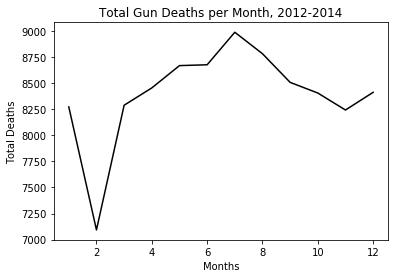

In [12]:
month_total_y = [8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]

plt.figure('total')
plt.clf()
plt.title('Total Gun Deaths per Month, 2012-2014')
plt.xlabel("Months")
plt.ylabel("Total Deaths")
plt.plot(months_x, month_total_y, 'k-')

## Intent Roundup

Overall:
I made graphs. I'm so proud. 

Starting out I had two main hypotheses: 
- There would be higher rates of homicide in the summer.
- There would be higher rates of suicide in the winter (around the holidays).

In the end, only my hypothesis that homicide rates would be higher in the summer have born out. July had the greatest total of homicide-related gun deaths with over 3,200 recorded incidents. On the other hand, Suicide rates did the exact opposite of what I had expected, rising dramatically in the summer with peaks in May and July and falling steadily in the second half of the year. I'm not sure why this would be the case considering the increase in sunlight and warm weather. The one event I can think of is summer break. It may be interesting to see if the ages of suicide deaths change throughout the year. 

According to this dataset, February is the safest month for gun violence, but part of this might be that it's the shortest month of the year. The other part being that it's normally cold as shit. 

## Next Up

I'm going to see if I calculate average age for suicides per month to see if that changes. 

In [13]:
header

['',
 'year',
 'month',
 'intent',
 'police',
 'sex',
 'age',
 'race',
 'hispanic',
 'place',
 'education']

In [14]:
data[:5]

[['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'],
 ['5',
  '2012',
  '02',
  'Suicide',
  '0',
  'M',
  '31',
  'White',
  '100',
  'Other specified',
  '2']]

In [48]:
# steps
# extract ages according to months, append to list
# use the avg() function... i think. or just sum()/len(var) to get averages

month_ages = {}
for row in data:
    try: 
        if row[2] in month_ages:
                month_ages[row[2]].append(int(row[6]))
        else:
            month_ages[row[2]] = [int(row[6])]
    except ValueError:
        pass

print(month_ages['01'])

[34, 21, 60, 21, 59, 30, 58, 78, 60, 61, 55, 66, 52, 63, 40, 23, 57, 81, 63, 54, 46, 52, 59, 31, 64, 36, 40, 45, 47, 53, 55, 26, 28, 25, 68, 49, 48, 68, 45, 47, 37, 62, 60, 53, 36, 41, 25, 30, 41, 39, 35, 23, 19, 33, 23, 46, 21, 42, 34, 50, 25, 67, 56, 55, 17, 42, 29, 82, 54, 22, 47, 24, 19, 61, 77, 34, 54, 75, 40, 36, 39, 20, 28, 20, 78, 60, 58, 59, 73, 57, 28, 16, 31, 71, 42, 32, 48, 82, 56, 41, 37, 53, 32, 24, 38, 51, 37, 57, 29, 35, 36, 39, 40, 51, 36, 33, 28, 15, 19, 55, 83, 36, 43, 23, 32, 26, 61, 16, 54, 70, 75, 33, 37, 19, 24, 38, 80, 36, 30, 42, 65, 64, 24, 55, 35, 17, 44, 19, 21, 69, 24, 61, 62, 62, 29, 70, 21, 71, 39, 54, 82, 60, 40, 34, 38, 28, 32, 21, 25, 28, 80, 23, 72, 32, 32, 50, 46, 22, 24, 67, 18, 25, 26, 18, 59, 56, 91, 42, 66, 32, 51, 47, 35, 64, 64, 49, 69, 21, 43, 25, 50, 83, 40, 18, 30, 78, 39, 72, 59, 64, 39, 78, 35, 47, 22, 41, 24, 50, 24, 67, 22, 35, 51, 59, 24, 75, 60, 48, 77, 44, 25, 24, 29, 55, 25, 21, 16, 19, 20, 48, 55, 54, 24, 18, 52, 18, 21, 76, 63, 89,

In [27]:
# initial attempt successful with addition of try/except block to deal with cases where age = NA
# now need to narrow down results so that only Suicides are counted
suicide_month_ages = {}
for row in data:
    try: 
        if row[2] in suicide_month_ages and row[3] == 'Suicide':
                suicide_month_ages[row[2]].append(int(row[6]))
        elif row[3] == 'Suicide':
            suicide_month_ages[row[2]] = [int(row[6])]
    except ValueError:
        pass

print(len(month_ages['01']), len(suicide_month_ages['01']))

8270 5220


In [28]:
print(suicide_y)

[5220, 4732, 5309, 5438, 5506, 5367, 5514, 5421, 5343, 5256, 5086, 4983]


In [30]:
#confirm that total number of suicides and number of ages in suicide_month_ages are the same

#convert to averages

for month in suicide_month_ages:
    suicide_month_ages[month] = sum(suicide_month_ages[month]) / len(suicide_month_ages[month])

In [31]:
suicide_month_ages

{'01': 49.303256704980846,
 '02': 50.324878461213274,
 '03': 50.16763985684686,
 '04': 50.00128723795513,
 '05': 50.579004722121326,
 '06': 51.197875908328676,
 '07': 50.95992020311933,
 '08': 50.27749077490775,
 '09': 50.72187909414187,
 '10': 50.306565176022836,
 '11': 49.52006294256491,
 '12': 50.281268821521785}

## Intent Finale

I'm not even going to graph that. Average age across all months is solidly 50. I'm putting this section to bed. 

## Up Next

I'm adding in an additional problem that I did not originally plan to investigate, but that Dataquest suggested. It looks really interesting:

- Is there any correlation between education level and gun deaths?

Hypothesis:

- People with lower levels of education will be more susceptible to gun violence, including suicide and homicide.

I'm making this hypothesis based on the following: I believe people of lower education levels are more likely to own a gun and/or live in neighborhoods where gun violence is more common. Additionally, people with lower levels of education are likely to make less money and have fewer job opportunities making them susceptible to economic shocks. This can cause depression and, for some, drive someone to commit suicide.

#### Data Review

- `education`: education status of victim, can be one of the following (strings), index 10
    - `1`: Less than high school
    - `2`: Graduated from high school
    - `3`: Some college
    - `4`: At least graduated from college
    - `5`: Not available

#### Next steps

- Tally total occurrences across the three years where `intent` = `Suicide`; `education` values will be keys in dict
- Tally total occurrences across the three years where `intent` = `Homicide`; `education` values will be keys in dict
- Display data in bar graphs 
- Use Markdown cell to decipher

In [32]:
#making a dictionaries
homicide_per_edu = {}
suicide_per_edu = {}

for row in data: 
    if row[3] == 'Homicide':
        if row[10] in homicide_per_edu:  
            homicide_per_edu[row[10]] += 1
        else: 
            homicide_per_edu[row[10]] = 1
    elif row[3] == 'Suicide':
        if row[10] in suicide_per_edu:  
            suicide_per_edu[row[10]] += 1
        else: 
            suicide_per_edu[row[10]] = 1

print(homicide_per_edu)
print(suicide_per_edu)

{'2': 15649, '3': 5640, '5': 455, '1': 11839, '4': 1559, 'NA': 34}
{'4': 11147, '3': 15533, '2': 26321, '1': 9292, '5': 876, 'NA': 6}


In [44]:
# going to add NA to '5' which stands for not available... 
# creating lists for plotting
# education levels will be the y values this time

#pylab seems to alphabetize things when i want them in this order. So i'm adding in numbers
homicide_y = [11839, 15649, 5640, 1559, 489]
suicide_y = [9292, 26321, 15533, 11147, 882] 
x_legend = ['Less than HS', 'Graduated HS or equivalent', 'Some College', 'At least Graduated College', 'N/A']

# little worried about the graphing scale needed to plot all of these numbers. may have to jettison NA

In [40]:
import matplotlib.pyplot as plt

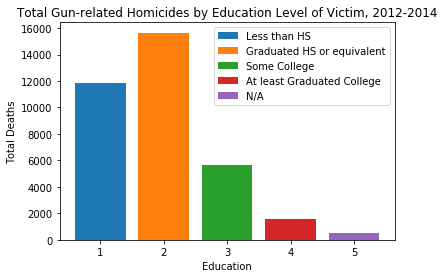

In [47]:
plt.figure('homicide by edu')
plt.clf()
plt.title("Total Gun-related Homicides by Education Level of Victim, 2012-2014")
plt.xlabel('Education')
plt.ylabel('Total Deaths')
plt.bar(1, 11839, label='Less than HS') #doing it this way to create education level legend
plt.bar(2, 15649, label='Graduated HS or equivalent')
plt.bar(3, 5640, label='Some College')
plt.bar(4, 1559, label='At least Graduated College')
plt.bar(5, 489, label='N/A')

plt.legend()

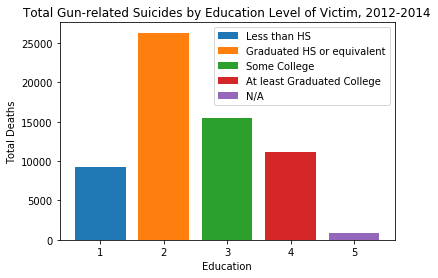

In [46]:
plt.figure('suicide by edu')
plt.clf()
plt.title("Total Gun-related Suicides by Education Level of Victim, 2012-2014")
plt.xlabel('Education')
plt.ylabel('Total Deaths')
plt.bar(1, 9292, label='Less than HS') #doing it this way to create education level legend
plt.bar(2, 26321, label='Graduated HS or equivalent')
plt.bar(3, 15533, label='Some College')
plt.bar(4, 11147, label='At least Graduated College')
plt.bar(5, 882, label='N/A')
plt.legend()

## Deaths by Education Level Roundup

Overall:

- Both hypotheses were proven correct, at least in the case of most deaths. The majority of victims recorded as `Homicide` and `Suicide` fell into category `2` meaning they had graduated high school, but not attended college. I would consider this a lower education level, although clearly not the lowest. 
- `Homicide`
    - The number of victims that fell into category `1`, less than high school education, and category `2` were significantly higher higher than categories `3` - `5`. 
    - My hypothesis regarding homicides is supported by this finding.
- `Suicide` 
    - The majority of victims again fell into category `2`.
    - Categories `3` (Some college) and `4` (At least gradated college) contain the next highest category of victims in descending order. In fact, categories `3` and `4` combined would be greater than the the total of victims in category `2` by around 300+ persons.
    - Category `1` (less than high school) actually contained the second smallest total gun-related suicides behind category `5` which was N/A.
    - In summation, there is not as strong a correlation between gun-related suicides and lower education levels as I originally thought. It would seem that ignorance is truly bliss.
    

## Next Up

The final investigation I'm making with this data: 

- Investigating instances of a gun death where a police officer was involved?
    - How was the `intent` classified when a police was involved with a gun-related death?
    - Any patterns present when taking into account race of victim?


#### Data Structure

- `intent`: intent of perp, (`Suicide`, `Accidental`, `NA`, `Homicide`, `Undetermined`), index 3
- `police`: whether a police officer was involved with the shooting, either `0` (false) or `1` (true), index 4
- `race`: race of victim, (`Asian/Pacific Islander`, `Native American/Native Alaskan`, `Black`, `Hispanic`, `White`), index 7

#### Next Steps

- Total all occurences where `police` is `1` (true)
- Create dictionary; where `police` is `1` (true), tally up occurrences of death by `intent` (keys)
- Create dictionary; where `police` is `1` (true), tally up occurrences of death by `race` (keys)
- Investigate findings, create more dictionaries as needed (e.g. combining `race` and `intent` to see if there is any difference in how `intent` was recorded by `race`)
- Markdown cell to conclude.

In [49]:
police_inv_totals = tally_occurrences(data, 4)
print(police_inv_totals)

{'0': 99396, '1': 1402}


In [51]:
police_true_intent = {}
for row in data: 
    if row[4] == '1':
        if row[3] in police_true_intent:  
            police_true_intent[row[3]] += 1
        else:
            police_true_intent[row[3]] = 1

print(police_true_intent)

{'Homicide': 1402}


In [53]:
# separating race out from intent to make sure both are populating
police_true_race = {}
for row in data:
    if row[4] == '1':
        if row[7] in police_true_race:
            police_true_race[row[7]] += 1
        else: 
            police_true_race[row[7]] = 1

print(police_true_race)

{'White': 709, 'Native American/Native Alaskan': 25, 'Black': 356, 'Hispanic': 282, 'Asian/Pacific Islander': 30}


In [55]:
# borrowing from exercises above about calculating killings/100,000 of a racial population
# remember that there's another category called Two or More Races which we're ignoring here
mapping = {'Asian/Pacific Islander': 15834141, 'Black':40250635, 'Hispanic': 44618105, 'Native American/Native Alaskan': 3739506, 'White': 197318956}
race_per_hundredk_police_inv = {}
for key, value in police_true_race.items():
    race_per_hundredk_police_inv[key] = (value / mapping[key]) * 1000000

print(race_per_hundredk_police_inv)

{'White': 3.593167196769478, 'Native American/Native Alaskan': 6.685375020122979, 'Black': 8.844580961269306, 'Hispanic': 6.320304280067475, 'Asian/Pacific Islander': 1.8946401955117111}


## Police Involvement Roundup

Overall

- Every instance of a gun death where a police officer was involved was recorded as `Homicide`, there were a total 1,402 instances. 
- Regarding total number of instances of shootings where a police officer was involved broken down by race, in descending order: 
    - `White`: 709 
    - `Black`: 356 
    - `Hispanic`: 282 
    - `Asian/Pacific Islander`: 30
    - `Native American/Native Alaskan`: 25 
- More telling is the number of shootings per 1,000,000 (per 100,000 resulted in numbers less than 0), in descending order:
    - `Black`: 8.8 / 1,000,000
    - `Native American/Native Alaskan`: 6.7 / 1,000,000
    - `Hispanic`: 6.3 / 1,000,000
    - `White`: 3.6 / 1,000,000
    - `Asian/Pacific Islander`: 1.9 / 1,000,000
- In summary, police shootings* constituted very few of the total recorded gun deaths between 2012-2014. More shootings involved a white victim than other racial groups. However, white victims constituted a smaller proportion of the overall white population (3.6). Per 1,000,000 persons, black victims had the highest proportion with 8.8, followed by Native American/Native Alaskan victims (6.7) and hispanic victims (6.3). 

#### Note on data*
Based on Dataquest's description of the `police` category (whether a police officer was involved with the shooting), I had assumed this meant that a police officer was the shooter. However, this was not stated explicitly, and the [FiveThirtyEight study](https://fivethirtyeight.com/features/gun-deaths/) that this data was taken from also included data on shooting of police officers. If any of the instances in this dataset include instances where a police officer is the victim, the findings above are void.

#### Link to Solutions
[Link](https://github.com/dataquestio/solutions/blob/master/Mission218Solution.ipynb) to Dataquest solutions notebook.